In [1]:
import numpy as np
import matplotlib.pyplot as plt



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
# Mean and covariance
mu = np.array([0.14, 0.07, 0.16])
Sigma = np.array([
    [0.0625, -0.01, 0.0375],
    [-0.01, 0.01, -0.015],
    [0.0375, -0.015, 0.09]
])

n_samples = 10_000
returns = np.random.multivariate_normal(mu, Sigma, size=n_samples)

# Compute the total return (average of all 3 investments per sample)
total_returns = returns.mean(axis=1)  # axis=1 → average across columns (investments)


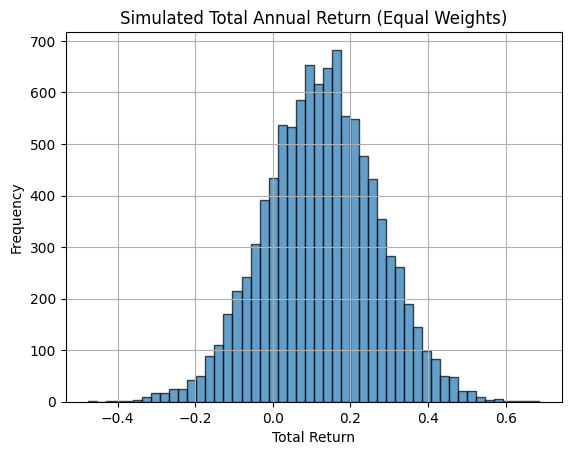

Estimated mean total return: 0.1242
Estimated standard deviation: 0.1441


In [6]:

# Plot histogram
plt.hist(total_returns, bins=50, edgecolor='k', alpha=0.7)
plt.title('Simulated Total Annual Return (Equal Weights)')
plt.xlabel('Total Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print basic statistics
print(f"Estimated mean total return: {np.mean(total_returns):.4f}")
print(f"Estimated standard deviation: {np.std(total_returns):.4f}")


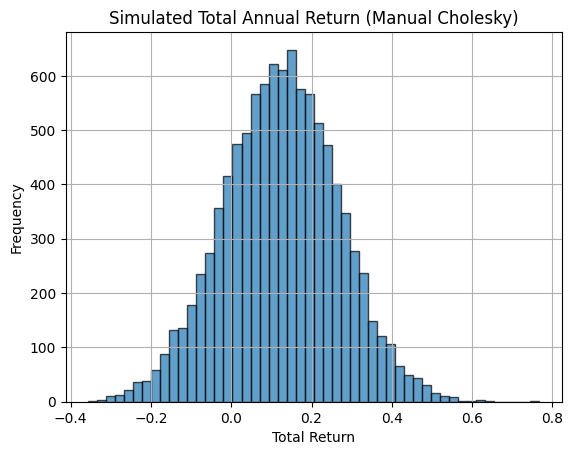

Estimated mean total return: 0.1239
Estimated std deviation: 0.1430


In [7]:
# Step 2: Cholesky decomposition
L = np.linalg.cholesky(Sigma)

# Step 3: Generate standard normal samples (Z ~ N(0, I))
n_samples = 10_000
Z = np.random.randn(n_samples, 3)  # shape (10000, 3)

# Step 4: Transform to correlated samples
X = mu + Z @ L.T  # shape (10000, 3)

# Step 5: Compute total (average) return per sample
total_returns = X.mean(axis=1)

# Step 6: Plot histogram
plt.hist(total_returns, bins=50, edgecolor='k', alpha=0.7)
plt.title('Simulated Total Annual Return (Manual Cholesky)')
plt.xlabel('Total Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 7: Print statistics
print(f"Estimated mean total return: {np.mean(total_returns):.4f}")
print(f"Estimated std deviation: {np.std(total_returns):.4f}")

## Confidante interval

In [8]:
# Compute the 95% confidence interval for the mean
mean_return = np.mean(total_returns)
std_return = np.std(total_returns, ddof=1)  # sample std dev
n = len(total_returns)

# z-value for 95% confidence
z = 1.96

# Margin of error
margin = z * std_return / np.sqrt(n)

# Confidence interval
ci_lower = mean_return - margin
ci_upper = mean_return + margin

print(f"95% Confidence Interval for the mean total return: ({ci_lower:.4f}, {ci_upper:.4f})")


95% Confidence Interval for the mean total return: (0.1211, 0.1267)
